<a href="https://colab.research.google.com/github/jacquelineangeles/Jacquelienangeles/blob/main/LAb_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Title: ELECTROCARDIOGRAPHY

Purpose
The experiment explores the heart's electrical activity through electrocardiography EKG or ECG, creating visual records of changes in electrical signals. Electrocardiogram electrodes, strategically placed in specific lead arrangements, influence EKG wave amplitudes. Willem Einthoven's contributions, particularly Einthoven's triangle, reveal the relationship among leads I, II, and III. Einthoven's Law (Lead I + Lead III = Lead II) encapsulates these relationships. Overall, the experiment aims to deepen understanding of the heart's electrical patterns and the principles guiding EKG recordings.

procedure:


1.   Ensure the IWX/214 unit is plugged in and connected to the laptop via a USB cable.
2. Confirm that the C-AAMI-504 EEG cable is correctly inserted into the isolated inputs of Channels 1 and 2 of the IWX/214. Place the three color-coded lead wires in the lead pedestal of the C-AAMI-504 EEG cable and insert the connectors on the red, black, and green electrode lead wires into the matching sockets on the lead pedestal of the ECG cable. Neatly store the white and brown lead wires in the Iworx case for future use.
3. Once all connections are established, start by turning on the laptop, allowing it to fully boot up before turning on the IWX/214 unit. Once the Iworx unit is on, the red indicator light on the Iworx unit should illuminate.
4. Open the Labscribe3 program by clicking its icon on the desktop. A pop-up window saying "Hardware found IWX214:2008-1-24" should appear; click "OK."
5. In the "Settings" tab, select "Human Heart" and then "ECG-HeartSounds." You can hide the lower "Heart Sounds" row by clicking on the  symbol, selecting "Hide," and confirming with "Yes."
6. Apply disposable ECG electrodes to the subject's right wrist and the insides of both ankles. Connect the black (-1) electrode to the right wrist, the red (+1) electrode to the left ankle, and the green (C or ground) electrode to the right ankle.
7. Instruct the subject to sit quietly. Avoid any movement in the arms or upper body, as it may introduce noise to the ECG recording.
8. Click the Record button on the upper right side of the LabScribe Main window. If the ECG appears upside down in Lead II, click on the upside-down triangle and select "Invert." Do this only once.
9. When a suitable trace is visible, type the subject's name and "Lead II" in the Mark box to attach comments to the data. Press Enter to mark the beginning of the recording.
10. Click the AutoScale tab to adjust the ECG display. Consider using the "Half 11. Display Time" tab if needed, and record for approximately one minute.
12. Click Stop to end the recording, and label one set of the five ECG waves (P, Q, R, S, and T). Note variations in cycles and distances between QRS complexes.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [ ]:
data = pd.read_csv (r'/content/_ECG.txt', sep = '\t')
data

,Time,Lead II
0,0.00,0.000000
1,0.01,0.000000
2,0.02,0.000000
3,0.03,0.000000
4,0.04,0.000000
...,...,...
1966,19.66,-0.011862
1967,19.67,-0.073096
1968,19.68,-0.050300
1969,19.69,-0.041629


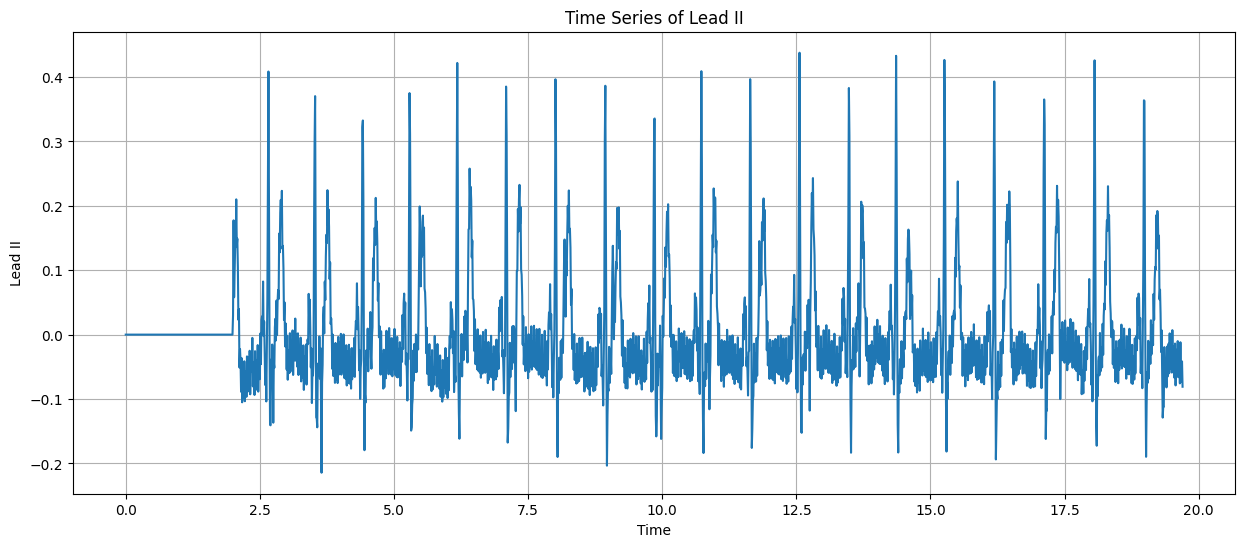

In [ ]:
df = pd.DataFrame(data)

# Plot the data to visually inspect
plt.figure(figsize=(15, 6))
plt.plot(df['Time'], df['Lead II'])
plt.xlabel('Time')
plt.ylabel('Lead II')
plt.title('Time Series of Lead II')
plt.grid(True)
plt.show()

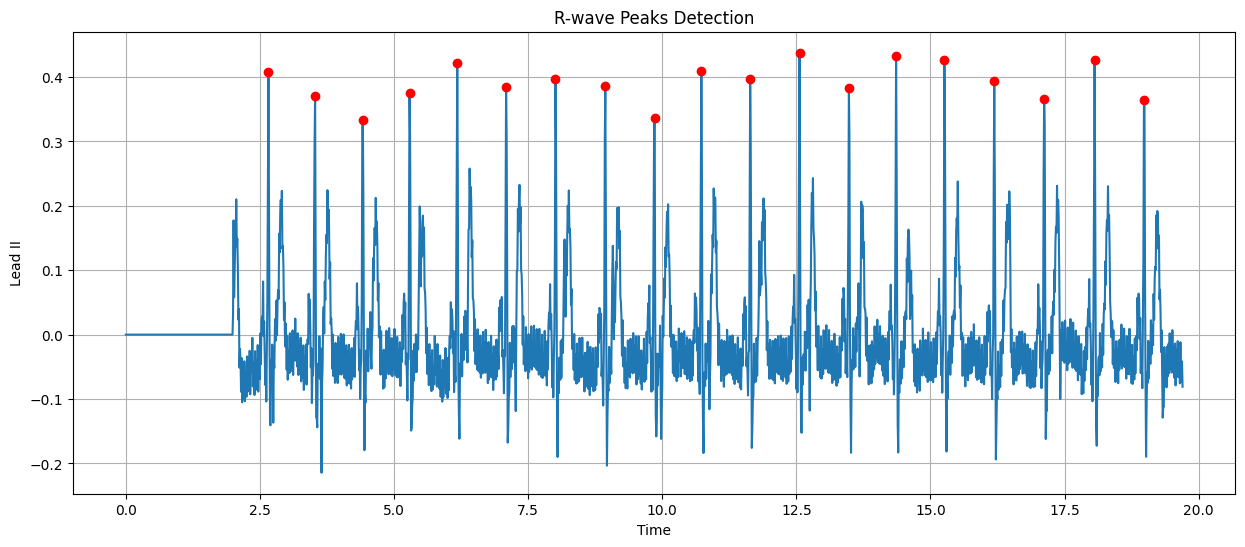

In [ ]:
# Detect R-wave peaks
peak_indices, _ = find_peaks(df['Lead II'], height=.3)  # You might need to adjust parameters like distance, height, etc.
# Plot the data with detected peaks
plt.figure(figsize=(15, 6))
plt.plot(df['Time'], df['Lead II'])
plt.plot(df['Time'].iloc[peak_indices], df['Lead II'].iloc[peak_indices], 'ro')
plt.xlabel('Time')
plt.ylabel('Lead II')
plt.title('R-wave Peaks Detection')
plt.grid(True)
plt.show()

In [ ]:
# Calculate RR intervals
rr_intervals = df['Time'].iloc[peak_indices].diff().dropna().values

# Calculate heart rate in BPM
average_rr_interval = rr_intervals.mean()
heart_rate = 60 / average_rr_interval

print(f"Average RR interval: {average_rr_interval:.2f} seconds")
print(f"Heart rate: {heart_rate:.2f} BPM")


Average RR interval: 0.91 seconds
Heart rate: 66.18 BPM


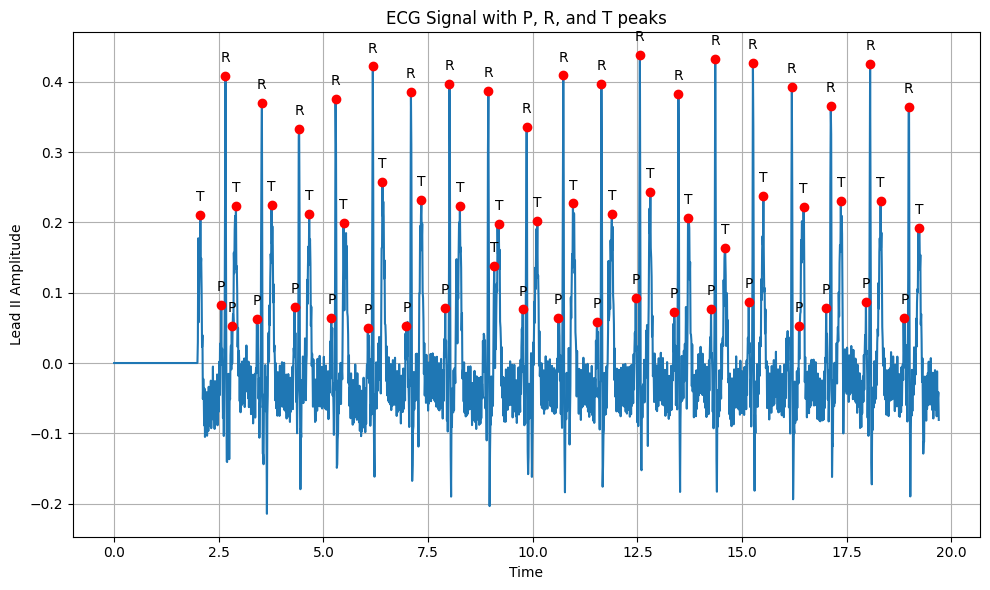

In [ ]:
# Detect all peaks without amplitude restriction
peaks, _ = find_peaks(df['Lead II'], distance=10, height=0.05) #Distance and height will need to change depending upon your data

# Classify peaks based on their amplitude
def classify_peak(amp):
    if amp > 0.3: #This height will depend on your data
        return 'R'
    elif 0.1 <= amp <= 0.3: #This height will depend on your data
        return 'T'
    else:
        return 'P'

labels = [classify_peak(df['Lead II'][peak]) for peak in peaks]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Lead II'], label='ECG Signal')

# Annotate each peak based on its label
for peak, label in zip(peaks, labels):
    plt.plot(df['Time'][peak], df['Lead II'][peak], "ro")
    plt.annotate(label, (df['Time'][peak], df['Lead II'][peak]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Time')
plt.ylabel('Lead II Amplitude')
plt.title('ECG Signal with P, R, and T peaks')
plt.grid(True)
plt.tight_layout()
plt.show()

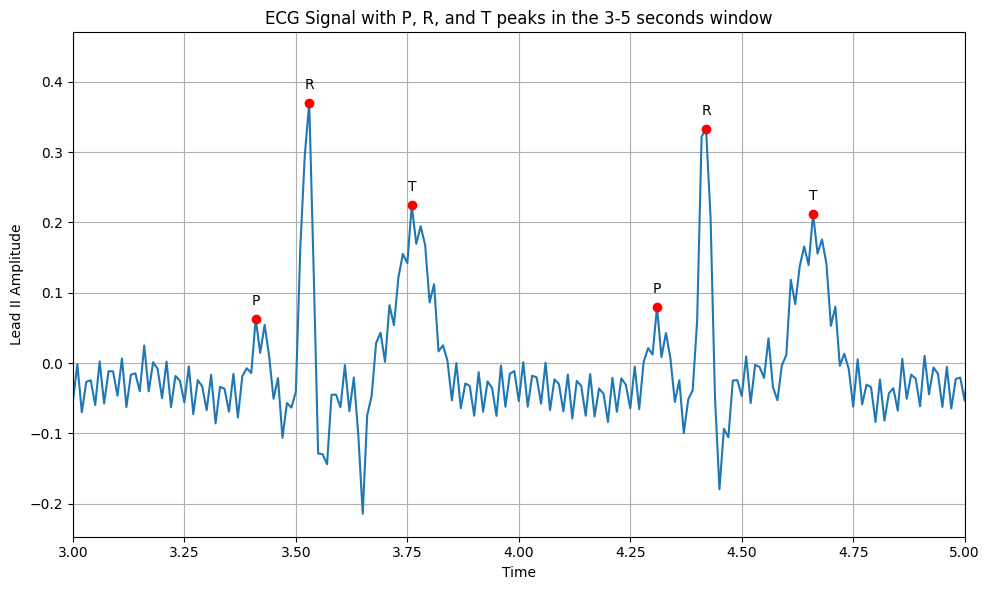

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Lead II'], label='ECG Signal')

# Annotate each peak based on its label
for peak, label in zip(peaks, labels):
    plt.plot(df['Time'][peak], df['Lead II'][peak], "ro")
    plt.annotate(label, (df['Time'][peak], df['Lead II'][peak]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Time')
plt.ylabel('Lead II Amplitude')
plt.title('ECG Signal with P, R, and T peaks in the 3-5 seconds window')
plt.grid(True)

# Set x-axis limits to zoom into the 3-5 seconds time window
plt.xlim(3, 5)

plt.tight_layout()
plt.show()


Discussion:
In this lab, we marked the P-wave, R-wave, and T-wave visually. The P-wave shows atrial depolarization with a smooth, rounded shape lasting about 0.06 to 0.12 seconds. The "R" wave represents ventricular depolarization, and its shape can vary in height and width. The T-wave indicates ventricular repolarization, usually rounded and following the QRS complex. Its duration is generally less than 0.20 seconds. The ST segment, between ventricular depolarization and repolarization, is the baseline of the EKG. Changes in elevation or depression might suggest cardiac issues.
This lab was interesting, though a bit confusing initially about where to place the wires on the body.







Conclusion: In conclusion, this lab helped us visually understand essential aspects of an EKG. We recognized the P-wave, showing atrial depolarization in a smooth, rounded shape lasting 0.06 to 0.12 seconds. The "R" wave, representing ventricular depolarization, had varying height and width. The T-wave, denoting ventricular repolarization, followed the QRS complex with a duration of less than 0.20 seconds. We examined the ST segment, the baseline between ventricular depolarization and repolarization, for potential cardiac issues. Moving forward, we can now identify and explain each EKG component, understand instrument functions, comprehend Einthoven's Triangle and Law, and identify common abnormalities in EKG patterns.